In [1]:
# Import Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
# Load data from csv
house_data = pd.read_csv("train.csv")
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
house_data.shape

(1460, 81)

In [4]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
house_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# Lets drop the columns that have missing values. As we understand from the info() - Alley, PoolQC, MiscFeature, Fence
house_data= house_data.drop(columns= ['Alley', 'PoolQC', 'MiscFeature', 'Fence'])

In [7]:
#check Missing values of columns
house_data.isnull().sum()[house_data.isnull().sum()>0]

LotFrontage     259
MasVnrType      872
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [8]:
# Where larger missing values are there - Lets replace the missing values of columns with its median
house_data.LotFrontage.value_counts()

LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: count, Length: 110, dtype: int64

In [9]:
#impute missing values of LotFrontage with median due to some outliers in data shown from Descibe section
house_data.LotFrontage = house_data.LotFrontage.fillna(house_data.LotFrontage.median())

In [10]:
house_data.FireplaceQu.value_counts()

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

In [11]:
# lets set the missing value of FireplaceQu as NA
house_data.FireplaceQu = house_data.FireplaceQu.fillna('NA')

In [12]:
#replace Nan values of MasVnrArea with None i.e. No Masonary type
house_data.MasVnrType = house_data.MasVnrType.fillna('None')

In [13]:
#impute missing values of MasVnrArea with median due to some outliers in data shown from Descibe section
house_data.MasVnrArea = house_data.MasVnrArea.fillna(house_data.MasVnrArea.median())    

In [14]:
#replace Nan values of BsmtQual with NA i.e. No Basement
house_data.BsmtQual = house_data.BsmtQual.fillna('NA')

In [15]:
#replace Nan values of BsmtCond with NA i.e. No Basement
house_data.BsmtCond = house_data.BsmtCond.fillna('NA')

In [16]:
#replace Nan values of BsmtExposure with No i.e. No Exposure
house_data.BsmtExposure = house_data.BsmtExposure.fillna('No')

In [17]:
#replace Nan values of BsmtFinType1 with NA i.e. No Basement
house_data.BsmtFinType1 = house_data.BsmtFinType1.fillna('NA')

In [18]:
#replace Nan values of BsmtFinType2 with NA i.e. No Basement
house_data.BsmtFinType2 = house_data.BsmtFinType2.fillna('NA')

In [19]:
#impute missing values of Electrical with mode due to categorical column
house_data.Electrical = house_data.Electrical.fillna(house_data.Electrical.mode()[0])    

In [20]:
#replace Nan values of GarageType with NA i.e. No Garage
house_data.GarageType = house_data.GarageType.fillna('NA')

In [21]:
#replace Nan values of GarageYrBlt with 0 i.e. No Garage
house_data.GarageYrBlt = house_data.GarageYrBlt.fillna(0)

In [22]:
#replace Nan values of GarageFinish with NA i.e. No Garage
house_data.GarageFinish = house_data.GarageFinish.fillna('NA')

In [23]:
#replace Nan values of GarageQual with NA i.e. No Garage
house_data.GarageQual = house_data.GarageQual.fillna('NA')

In [24]:
#replace Nan values of GarageCond with NA i.e. No Garage
house_data.GarageCond = house_data.GarageCond.fillna('NA')

In [25]:
#check missing values again
house_data.isnull().sum()[house_data.isnull().sum()>0]

Series([], dtype: int64)

In [26]:
#calculate the age of house i.e. HouseAge from YrSold - YearBuilt 
house_data['HouseAge'] = house_data.YrSold - house_data.YearBuilt
# Lets delete the YrSold and YearBuilt columns
house_data= house_data.drop(columns= ['YrSold', 'YearBuilt'])

### Convert columns to categorical data

In [27]:
#convert ExterQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'ExterQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})
#convert BsmtQual 0,1,2,3,4,5 -> NA, Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'BsmtQual':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})
#convert BsmtExposure 0,1,2,3,4 -> NA, No, Mn, Av, gd
house_data = house_data.replace({'BsmtExposure':{'NA':0, 'No':1,'Mn':2, 'Av':3, 'Gd':4}})
#convert BsmtFinType1 0,1,2,3,4,5,6 -> NA, Unf, LwQ, Rec, BLQ, ALQ, GLQ
house_data = house_data.replace({'BsmtFinType1':{'NA':0,'Unf':1,'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}})
#convert HeatingQC 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'HeatingQC':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})
#convert KitchenQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'KitchenQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})
#convert FireplaceQu 0,1,2,3,4,5 -> NA, Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'FireplaceQu':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [28]:
#convert MSSubClass into object type 
convert_dict = {'MSSubClass':object}
house_data = house_data.astype(convert_dict)

In [29]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearRemo

In [30]:
#Drop columns which have moe than 80% bias data
house_data=house_data.drop(columns=['Id','Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond'
                                    ,'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond'
                                    , 'PavedDrive', 'Condition1', 'BldgType', 'ExterCond', 'BsmtFinType2', 'SaleType'
                                    , 'SaleCondition'])

In [31]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 55 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   HouseStyle     1460 non-null   object 
 8   OverallQual    1460 non-null   int64  
 9   OverallCond    1460 non-null   int64  
 10  YearRemodAdd   1460 non-null   int64  
 11  RoofStyle      1460 non-null   object 
 12  Exterior1st    1460 non-null   object 
 13  Exterior2nd    1460 non-null   object 
 14  MasVnrType     1460 non-null   object 
 15  MasVnrArea     1460 non-null   float64
 16  ExterQual      1460 non-null   int64  
 17  Foundation     1460 non-null   object 
 18  BsmtQual

### Create Dummy Variables

In [32]:
def CreateDummyAndAppend(house_data, colName):
    data_df = pd.get_dummies(house_data[colName],drop_first=True,dtype=int, prefix=colName)
    #concat data_df with main house_data df
    house_data = pd.concat([house_data,data_df],axis=1)
    house_data = house_data.drop(columns=[colName])
    return house_data

In [33]:
house_data = CreateDummyAndAppend(house_data,'MSSubClass')
house_data = CreateDummyAndAppend(house_data,'MSZoning')
house_data = CreateDummyAndAppend(house_data,'LotShape')
house_data = CreateDummyAndAppend(house_data,'LotConfig')
house_data = CreateDummyAndAppend(house_data,'Neighborhood')
house_data = CreateDummyAndAppend(house_data,'HouseStyle')
house_data = CreateDummyAndAppend(house_data,'RoofStyle')
house_data = CreateDummyAndAppend(house_data,'Exterior1st')
house_data = CreateDummyAndAppend(house_data,'Exterior2nd')
house_data = CreateDummyAndAppend(house_data,'MasVnrType')
house_data = CreateDummyAndAppend(house_data,'Foundation')
house_data = CreateDummyAndAppend(house_data,'GarageType')
house_data = CreateDummyAndAppend(house_data,'GarageFinish')

In [34]:
house_data.shape

(1460, 149)

In [35]:
house_data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
0,65.0,8450,7,5,2003,196.0,4,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,2003.0,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1,80.0,9600,6,8,1976,0.0,3,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,1976.0,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
2,68.0,11250,7,5,2002,162.0,4,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,2001.0,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
3,60.0,9550,7,5,1970,0.0,3,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,1998.0,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,84.0,14260,8,5,2000,350.0,4,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,2000.0,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,

### Prepairing Data For Modeling

In [36]:
df_train,df_test = train_test_split(house_data,train_size=0.70,random_state=100)
print(df_train.shape)
print(df_test.shape)

(1021, 149)
(439, 149)


### Rescalling The Numeric Varaibles

In [37]:
#instantiate the object
scaler = StandardScaler()

#create list of numeric variables
num_vars = ['LotFrontage','LotArea','OverallQual','OverallCond','YearRemodAdd','MasVnrArea', 'ExterQual', 'BsmtQual'
            , 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'TotalBsmtSF'
           , 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath'
            , 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces'
           , 'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch'
           , '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'HouseAge']

#fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
318,0.925326,-0.057261,0.648310,-0.532073,0.389207,0.809137,1.051361,0.577925,2.181065,1.138412,1.159065,-0.293313,-0.454262,0.621091,0.871757,0.511410,2.137583,-0.124502,2.121655,1.066863,-0.247791,0.784821,1.244440,1.395790,-0.234155,0.741868,1.555150,0.622148,0.658513,0.274068,1.646935,0.867501,1.988123,0.195951,1.912645,-0.121922,-0.275126,-0.062302,-0.084263,-0.833178,260000,-0.675791,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
239,-0.795709,-0.169753,-0.066511,-1.448170,-1.698692,-0.558025,-0.699764,-0.533302,-0.653302,-0.753845,-0.761831,-0.293313,0.172244,-0.712611,-1.181447,-0.931882,0.793638,-0.124502,-0.058599,-0.837450,-0.247791,-1.028080,1.244440,0.175669,-0.234155,-0.776063,0.308833,0.622148,1.206469,0.177351,-1.034916,-1.188045,-0.744598,1.405086,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.833178,113000,0.939707,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
986,-0.478677,-0.502762,-0.066511,2.216221,0.874765,-0.558025,-0.699764,-0.533302,-0.653302,-1.226909,-0.964030,-0.293313,-0.175567,-1.257424,-0.154845,-0.421449,0.667284,-0.124502,0.219811,-0.837450,-0.247791,-1.028080,-0.753316,-1.044452,-0.234155,0.741868,-0.937484,-0.927153,-0.985354,0.179549,-1.034916,-1.023035,2.422143,-0.710899,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.10

### Training The Model

In [38]:
#create X_train,y_train 
#cnt is out Target/dependent Variable
y_train = df_train.pop('SalePrice')
X_train = df_train

### RFE- Recursive Feature Elimination

___Take Top 35 Features from `RFE`___

In [39]:
#Running RFE with the out variables equals to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=35)
rfe = rfe.fit(X_train,y_train)

In [40]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 65),
 ('LotArea', False, 46),
 ('OverallQual', True, 1),
 ('OverallCond', False, 49),
 ('YearRemodAdd', False, 96),
 ('MasVnrArea', False, 57),
 ('ExterQual', False, 54),
 ('BsmtQual', False, 36),
 ('BsmtExposure', False, 30),
 ('BsmtFinType1', False, 67),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 6),
 ('BsmtUnfSF', False, 4),
 ('TotalBsmtSF', False, 2),
 ('HeatingQC', False, 108),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 3),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 55),
 ('BsmtHalfBath', False, 83),
 ('FullBath', False, 76),
 ('HalfBath', False, 82),
 ('BedroomAbvGr', False, 74),
 ('KitchenAbvGr', False, 53),
 ('KitchenQual', False, 38),
 ('TotRmsAbvGrd', False, 107),
 ('Fireplaces', False, 106),
 ('FireplaceQu', False, 71),
 ('GarageYrBlt', False, 86),
 ('GarageCars', False, 42),
 ('GarageArea', False, 98),
 ('WoodDeckSF', False, 92),
 ('OpenPorchSF', False, 111),
 ('EnclosedPorch', False, 110),
 ('3SsnPorch', Fa

In [41]:
#selected columns from rfe
col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'BsmtFinSF1', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'MSSubClass_120', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR3', 'LotConfig_FR2', 'LotConfig_FR3', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'HouseStyle_2.5Unf', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 'Exterior2nd_CmentBd', 'Exterior2nd_ImStucc', 'Exterior2nd_Stone', 'GarageType_NA', 'GarageFinish_NA', 'GarageFinish_RFn', 'GarageFinish_Unf'], dtype='object')

### Building model using statsmodel

In [42]:
#ceatinf X_train with RFE selected columns
X_train_rfe = X_train[col]
#adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)
#create a RFE model
lm = sm.OLS(y_train,X_train_rfe).fit()  #Running the linear Model
#Get the Summary of Linear Model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     133.3
Date:                Tue, 16 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:23:39   Log-Likelihood:                -12110.
No. Observations:                1021   AIC:                         2.429e+04
Df Residuals:                     988   BIC:                         2.445e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   1.7e+05   8850.683     19.207      0.000    1.53e+05    1.87e+05
OverallQual           2.824e+04   1787.258     15.801      0.000    2.47e+04    3.17e+04
BsmtFinSF1            7562.8237   1272.432      5.944      0.000    5065.843    1.01e+04
1stFlrSF              3.294e+04   9544.329      3.451      0.001    1.42e+04    5.17e+04
2ndFlrSF                2.7e+04   1.04e+04      2.606      0.009    6672.660    4.73e+04
GrLivArea            -1.213e+04   1.25e+04     -0.974      0.330   -3.66e+04    1.23e+04
MSSubClass_120       -1.922e+04   5151.607     -3.730      0.000   -2.93e+04   -9106.340
MSZoning_RH           1.073e+04   1.28e+04      0.837      0.403   -1.44e+04    3.59e+04
MSZoning_RL           2.309e+04   8440.612      2.736      0.006    6526.850    3.97e+04
MSZoning_RM           9538.2827   8836.473      1.079      0.281   -7802.128    2.69e+04
LotShape_IR3         -2.194e+04    1.2e+04     -1.835      0.067   -4.54e+04    1517.231
LotConfig_FR2        -1.107e+04   6495.845     -1.705      0.089   -2.38e+04    1672.943
LotConfig_FR3         -1.79e+04   2.04e+04     -0.878      0.380   -5.79e+04    2.21e+04
Neighborhood_ClearCr  2.734e+04   8034.930      3.402      0.001    1.16e+04    4.31e+04
Neighborhood_Crawfor  2.563e+04   6560.548      3.907      0.000    1.28e+04    3.85e+04
Neighborhood_Edwards -1.463e+04   4492.771     -3.257      0.001   -2.34e+04   -5814.489
Neighborhood_NoRidge   6.19e+04   6762.188      9.155      0.000    4.86e+04    7.52e+04
Neighborhood_NridgHt  5.877e+04   5460.764     10.763      0.000    4.81e+04    6.95e+04
Neighborhood_Somerst  4.059e+04   8133.725      4.990      0.000    2.46e+04    5.66e+04
Neighborhood_StoneBr  3.421e+04   1.05e+04      3.266      0.001    1.37e+04    5.48e+04
Neighborhood_Veenker  4.073e+04   1.09e+04      3.752      0.000    1.94e+04     6.2e+04
HouseStyle_2.5Unf    -1.817e+04   1.28e+04     -1.425      0.154   -4.32e+04    6852.870
Exterior1st_AsphShn   -2.03e+04   1.77e+04     -1.145      0.252   -5.51e+04    1.45e+04
Exterior1st_BrkComm  -1.729e+04   2.51e+04     -0.690      0.491   -6.65e+04    3.19e+04
Exterior1st_CBlock   -1.578e+04   1.75e+04     -0.900      0.369   -5.02e+04    1.86e+04
Exterior1st_Stone    -3.757e+04   2.76e+04     -1.362      0.174   -9.17e+04    1.66e+04
Exterior1st_Stucco   -2.236e+04   8155.875     -2.741      0.006   -3.84e+04   -6353.568
Exterior2nd_AsphShn   -2.03e+04   1.77e+04     -1.145      0.252   -5.51e+04    1.45e+04
Exterior2nd_CBlock   -1.578e+04   1.75e+04     -0.900      0.369   -5.02e+04    1.86e+04
Exterior2nd_CmentBd   8574.3737   6149.882      1.394      0.164   -3493.958    2.06e+04
Exterior2nd_ImStucc   1.579e+04   1.26e+04      1.258      0.209   -8840.149    4.04e+04
Exterior2nd_Stone     1.887e+04   2.25e+04      0.838    

In [43]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
22,Exterior1st_AsphShn,inf
33,GarageFinish_NA,inf
32,GarageType_NA,inf
28,Exterior2nd_CBlock,inf
27,Exterior2nd_AsphShn,inf
24,Exterior1st_CBlock,inf
5,GrLivArea,130.45
4,2ndFlrSF,90.24
3,1stFlrSF,76.59
0,const,65.86


In [44]:
X_train_new = X_train_rfe

In [45]:
def dropColumn(X_train_new, colName):
    ## Exterior1st_BrkComm has a higher pValue lets drop it and rebuild the model
    X_train_new = X_train_new.drop([colName],axis=1)
    X_train_lm = sm.add_constant(X_train_new)
    #Running the Linear Model
    lm = sm.OLS(y_train,X_train_lm).fit()
    #check the summary of model
    print(lm.summary())
    return X_train_new

In [46]:
def CheckVIF(X_train_new):
    #check VIF of RFE Model
    vif = pd.DataFrame()
    vif['Features'] = X_train_new.columns
    vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by='VIF',ascending=False)
    return vif

In [47]:
X_train_new = dropColumn(X_train_new, 'Exterior1st_BrkComm')
print(CheckVIF(X_train_new))

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     137.7
Date:                Tue, 16 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:23:39   Log-Likelihood:                -12111.
No. Observations:                1021   AIC:                         2.429e+04
Df Residuals:                     989   BIC:                         2.444e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   1.7e+05 

In [48]:
## MSZoning_RH - lets drop his caloumn as it has higer p-value
X_train_new = dropColumn(X_train_new, 'MSZoning_RH')
print(CheckVIF(X_train_new))

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     142.3
Date:                Tue, 16 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:23:40   Log-Likelihood:                -12111.
No. Observations:                1021   AIC:                         2.428e+04
Df Residuals:                     990   BIC:                         2.444e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.745e+05 

In [49]:
## MSZoning_RH - lets drop his caloumn as it has higer p-value
X_train_new = dropColumn(X_train_new, 'MSZoning_RM')
print(CheckVIF(X_train_new))

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     147.3
Date:                Tue, 16 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:23:41   Log-Likelihood:                -12111.
No. Observations:                1021   AIC:                         2.428e+04
Df Residuals:                     991   BIC:                         2.443e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.787e+05 

In [50]:
# Lets drop LotConfig_FR3 - p-value is high
X_train_new = dropColumn(X_train_new, 'LotConfig_FR3')
print(CheckVIF(X_train_new))

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     152.5
Date:                Tue, 16 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:23:42   Log-Likelihood:                -12112.
No. Observations:                1021   AIC:                         2.428e+04
Df Residuals:                     992   BIC:                         2.442e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.784e+05 

In [51]:
# Lets drop Exterior2nd_Stone - p-value is high
X_train_new = dropColumn(X_train_new, 'Exterior2nd_Stone')
print(CheckVIF(X_train_new))

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     158.2
Date:                Tue, 16 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:23:42   Log-Likelihood:                -12112.
No. Observations:                1021   AIC:                         2.428e+04
Df Residuals:                     993   BIC:                         2.442e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.784e+05 

In [52]:
# Lets drop Exterior2nd_CBlock - p-value is high
X_train_new = dropColumn(X_train_new, 'Exterior2nd_CBlock')
print(CheckVIF(X_train_new))

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     158.2
Date:                Tue, 16 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:23:43   Log-Likelihood:                -12112.
No. Observations:                1021   AIC:                         2.428e+04
Df Residuals:                     993   BIC:                         2.442e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.784e+05 

In [53]:
# Lets drop Exterior2nd_Stone - p-value is high
X_train_new = dropColumn(X_train_new, 'Exterior1st_CBlock')
print(CheckVIF(X_train_new))

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     164.3
Date:                Tue, 16 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:23:43   Log-Likelihood:                -12112.
No. Observations:                1021   AIC:                         2.428e+04
Df Residuals:                     994   BIC:                         2.441e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.782e+05 

In [54]:
# Lets drop LotConfig_FR3 - p-value is high
X_train_new = dropColumn(X_train_new, 'GrLivArea')
print(CheckVIF(X_train_new))

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     170.8
Date:                Tue, 16 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:23:44   Log-Likelihood:                -12113.
No. Observations:                1021   AIC:                         2.428e+04
Df Residuals:                     995   BIC:                         2.441e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.781e+05 

In [55]:
# Lets drop Exterior1st_Stone - p-value is high
X_train_new = dropColumn(X_train_new, 'Exterior1st_Stone')
print(CheckVIF(X_train_new))

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     177.8
Date:                Tue, 16 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:23:44   Log-Likelihood:                -12114.
No. Observations:                1021   AIC:                         2.428e+04
Df Residuals:                     996   BIC:                         2.440e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.778e+05 

In [56]:
# Lets drop Exterior1st_Stone - p-value is high
X_train_new = dropColumn(X_train_new, 'Exterior1st_AsphShn')
print(CheckVIF(X_train_new))

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     177.8
Date:                Tue, 16 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:23:44   Log-Likelihood:                -12114.
No. Observations:                1021   AIC:                         2.428e+04
Df Residuals:                     996   BIC:                         2.440e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.778e+05 

In [57]:
# Lets drop Exterior2nd_AsphShn - p-value is high
X_train_new = dropColumn(X_train_new, 'Exterior2nd_AsphShn')
print(CheckVIF(X_train_new))

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     185.5
Date:                Tue, 16 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:23:45   Log-Likelihood:                -12114.
No. Observations:                1021   AIC:                         2.428e+04
Df Residuals:                     997   BIC:                         2.439e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.778e+05 

In [58]:
# Lets drop Exterior2nd_ImStucc - p-value is high
X_train_new = dropColumn(X_train_new, 'Exterior2nd_ImStucc')
print(CheckVIF(X_train_new))

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     193.7
Date:                Tue, 16 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:23:45   Log-Likelihood:                -12115.
No. Observations:                1021   AIC:                         2.428e+04
Df Residuals:                     998   BIC:                         2.439e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.778e+05 

In [59]:
# Lets drop HouseStyle_2.5Unf - p-value is high
X_train_new = dropColumn(X_train_new, 'HouseStyle_2.5Unf')
print(CheckVIF(X_train_new))

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     202.6
Date:                Tue, 16 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:23:45   Log-Likelihood:                -12116.
No. Observations:                1021   AIC:                         2.428e+04
Df Residuals:                     999   BIC:                         2.438e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.773e+05 

In [60]:
# Lets drop Exterior1st_AsphShn - VIF is high
X_train_new = X_train_new.drop(['GarageFinish_NA'],axis=1)
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
print(lm.summary())
print(CheckVIF(X_train_new))

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     202.6
Date:                Tue, 16 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:23:46   Log-Likelihood:                -12116.
No. Observations:                1021   AIC:                         2.428e+04
Df Residuals:                     999   BIC:                         2.438e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.773e+05 

In [61]:
#drop the const
X_train_new = X_train_new.drop(['const'], axis=1)

### Residual analysis of Train Data

In [62]:
y_train_pred = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

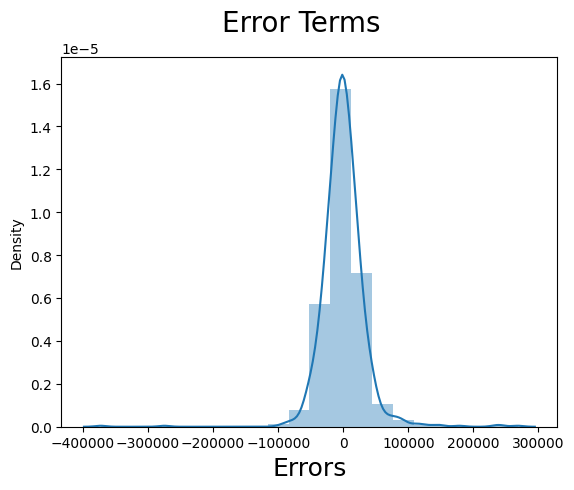

In [63]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [64]:
#evalate model
r2 = r2_score(y_true = y_train,y_pred = y_train_pred)
round(r2,2)

0.81

In [65]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_train - y_train_pred))
print(rss)
mse = mean_squared_error(y_train, y_train_pred)
print(mse)
rmse = mse**0.5
print(rmse)

1213416347221.4788
1188458714.2228
34474.02956172661


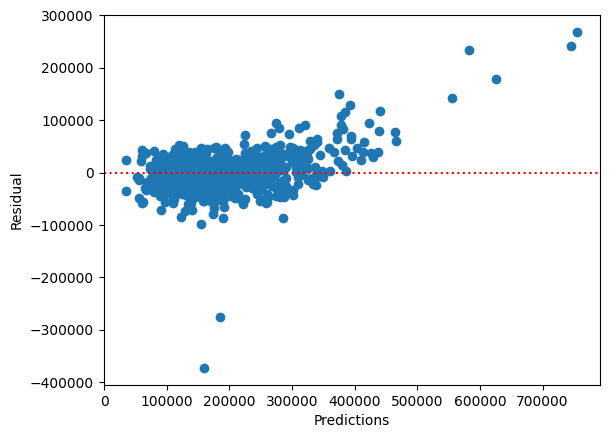

In [66]:
# Checking if error terms are independent of each other

plt.scatter(y_train,(y_train - y_train_pred))
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

## Evaluate model on test data

In [67]:
#scale Test set
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
1436,-0.433386,-0.144614,-1.496155,0.384025,-0.679020,-0.558025,-0.699764,-0.533302,-0.653302,0.665348,0.361022,-0.293313,-0.703973,-0.431488,-1.181447,-0.765928,-0.789230,-0.124502,-1.230557,-0.837450,-0.247791,-1.028080,-0.753316,0.175669,-0.234155,-0.776063,-0.937484,-0.927153,-0.985354,0.232304,0.306009,0.264038,-0.744598,-0.710899,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.469175,120500,-0.016404,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
57,0.880036,0.112107,0.648310,-0.532073,0.923321,-0.558025,1.051361,0.577925,-0.653302,-1.226909,-0.964030,-0.293313,0.660517,-0.440205,0.871757,-0.775986,1.186484,-0.124502,0.379709,-0.837450,-0.247791,0.784821,1.244440,0.175669,-0.234155,0.741868,0.308833,-0.927153,-0.985354,0.298247,0.306009,0.438477,-0.744598,0.347093,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,0.622834,196500,-1.137362,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
780,-0.297515,-0.253806,0.648310,-0.532073,0.534875,-0.355087,-0.699764,0.577925,-0.653302,-1.226909,-0.964030,-0.293313,1.501060,0.381373,-0.154845,0.212191,-0.789230,-0.124502,-0.498789,-0.837450,-0.247791,0.784821,-0.753316,0.175669,-0.234155,-0.776063,-0.314326,0.622148,0.658513,0.278464,0.306009,-0.329996,1.023633,-0.393502,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,

In [68]:
# Now let's use our model to make predictions.
#create y_test and X_test
y_test = df_test.pop('SalePrice')
X_test = df_test
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)
#Running the Linear Model
test_lm = sm.OLS(y_test,X_test_new).fit()
test_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     111.7
Date:                Tue, 16 Apr 2024   Prob (F-statistic):          1.03e-153
Time:                        14:23:47   Log-Likelihood:                -5174.8
No. Observations:                 439   AIC:                         1.039e+04
Df Residuals:                     418   BIC:                         1.048e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.716e+05   5630.387     30.469      0.000     1.6e+05    1.83e+05
OverallQual           2.921e+04   2708.524     10.784      0.000    2.39e+04    3.45e+04
BsmtFinSF1            1.286e+04   1947.473      6.606      0.000    9036.548    1.67e+04
1stFlrSF              2.674e+04   2461.654     10.862      0.000    2.19e+04    3.16e+04
2ndFlrSF              2.238e+04   2054.068     10.896      0.000    1.83e+04    2.64e+04
MSSubClass_120       -2.206e+04   7844.649     -2.812      0.005   -3.75e+04   -6642.927
MSZoning_RL           1.226e+04   4730.439      2.592      0.010    2963.730    2.16e+04
LotShape_IR3          -982.6608    3.3e+04     -0.030      0.976   -6.59e+04     6.4e+04
LotConfig_FR2        -1862.5521   8492.107     -0.219      0.827   -1.86e+04    1.48e+04
Neighborhood_ClearCr  5212.5218   1.21e+04      0.431      0.666   -1.85e+04     2.9e+04
Neighborhood_Crawfor  1.472e+04   7957.786      1.849      0.065    -926.230    3.04e+04
Neighborhood_Edwards -3920.2097   7243.444     -0.541      0.589   -1.82e+04    1.03e+04
Neighborhood_NoRidge  3.969e+04   1.41e+04      2.809      0.005    1.19e+04    6.75e+04
Neighborhood_NridgHt  7.806e+04   8881.176      8.790      0.000    6.06e+04    9.55e+04
Neighborhood_Somerst   2.26e+04   7856.557      2.876      0.004    7152.189     3.8e+04
Neighborhood_StoneBr  8.304e+04   1.05e+04      7.909      0.000    6.24e+04    1.04e+05
Neighborhood_Veenker -2.612e-12   3.52e-12     -0.741      0.459   -9.54e-12    4.32e-12
Exterior1st_Stucco    1283.5033   1.51e+04      0.085      0.932   -2.83e+04    3.09e+04
Exterior2nd_CmentBd   7616.9773   7520.979      1.013      0.312   -7166.677    2.24e+04
GarageType_NA        -1.713e+04   8726.605     -1.963      0.050   -3.43e+04      19.550
GarageFinish_RFn     -3926.3991   4524.132     -0.868      0.386   -1.28e+04    4966.485
GarageFinish_Unf     -9808.9158   4923.775     -1.992      0.047   -1.95e+04    -130.470
==============================================================================
Omnibus:                       82.263   Durbin-Watson:                   1.821
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              617.501
Skew:                           0.554   Prob(JB):                    8.15e-135
Kurtosis:                       8.704   Cond. No.                     1.52e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.78e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [69]:
# Making predictions
y_pred = lm.predict(X_test_new)

### calculate r2 score of Test model

In [70]:
#evalate model
r2 = r2_score(y_true = y_test,y_pred = y_pred)
round(r2,2)

0.81

In [71]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_test - y_pred))
print(rss)
mse = mean_squared_error(y_test, y_pred)
print(mse)
rmse = mse**0.5
print(rmse)

530654680396.77997
1208780593.158952
34767.522102660005


In [72]:
#drop the const
X_test_new = X_test_new.drop(['const'], axis=1)

Text(0, 0.5, 'y_pred')

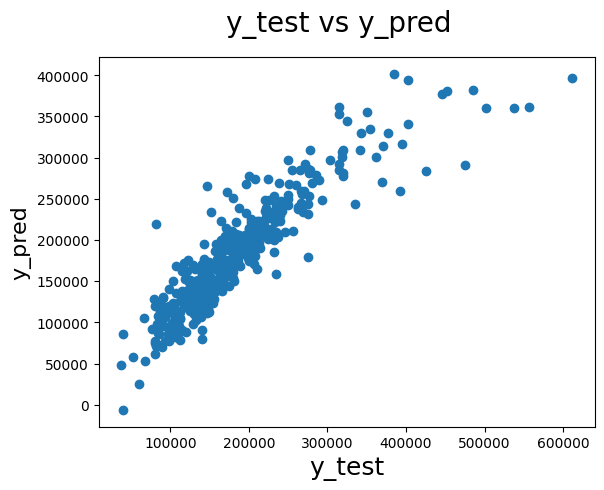

In [73]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [74]:
y_pred_train = lm.predict(X_train_lm)
# y_pred_test = test_lm.predict(X_test_new)
y_pred_test = y_pred

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8098646770561935
0.8122058395386335
1213416347221.4788
530654680396.77997
1188458714.2228
1208780593.158952


### Ridge Regression

In [75]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

### Lets try alpha = 10

In [76]:
#Fitting Ridge model for alpha = 20 and printing coefficients which have been penalised
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train)
print(ridge.coef_)

[ 31210.10942454   8267.64545839  24123.51348092  17451.82279315
 -11650.33931218  15784.96561224 -12596.25766275  -6304.80702889
  16737.10777169  15011.5941408  -14652.62196614  43678.46958877
  42562.69646429  25448.11583001  13345.3969761   17718.15821262
 -15540.83091423   8412.24824191 -18844.49421281 -13045.09523884
 -19681.52079808]


In [77]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_new)
y_pred_test = ridge.predict(X_test_new)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.804813199180526
0.8066271927307399
1245654154153.1987
546418402930.09204
1220033451.668167
1244688844.943262


### Lasso

In [78]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [79]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


### Lets try with alpha = 100

In [80]:
# Printing the best hyperparameter alpha
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 
lasso.coef_

array([ 29550.27685517,   7795.48648295,  23719.47658388,  16910.12239109,
       -14180.29545966,  15695.12719928, -11788.26998386,  -6329.45680659,
        21807.6952432 ,  19410.03036335, -14554.08976666,  58242.22094164,
        53194.02342561,  31087.29703461,  21639.96501438,  27782.11781415,
       -16569.42117518,   7803.94827983, -22126.32959089, -14449.0841966 ,
       -21163.84251188])

In [81]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8085493893868143
0.8089397157914019
1221810324387.916
539883848380.3075
1196680043.4749422
1229803754.8526366


In [82]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.098647e-01,8.048132e-01,8.085494e-01
1,R2 Score (Test),8.122058e-01,8.066272e-01,8.089397e-01
2,RSS (Train),1.213416e+12,1.245654e+12,1.221810e+12
3,RSS (Test),5.306547e+11,5.464184e+11,5.398838e+11
4,MSE (Train),3.447403e+04,3.492898e+04,3.459306e+04
5,MSE (Test),3.476752e+04,3.528015e+04,3.506856e+04


### Observation of coefficients after regularization

In [83]:
betas = pd.DataFrame(index=X_train_new.columns)
betas = pd.DataFrame(index=X_train_new.columns)
betas['Linear'] = lm.params
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas.head(10)

,Linear,Ridge,Lasso
OverallQual,28365.168738,31210.109425,29550.276855
BsmtFinSF1,7769.247425,8267.645458,7795.486483
1stFlrSF,23462.278248,24123.513481,23719.476584
2ndFlrSF,16728.831206,17451.822793,16910.122391
MSSubClass_120,-18785.394781,-11650.339312,-14180.295460
MSZoning_RL,15752.679839,15784.965612,15695.127199
LotShape_IR3,-21638.167794,-12596.257663,-11788.269984
LotConfig_FR2,-11127.856372,-6304.807029,-6329.456807
Neighborhood_ClearCr,27663.700826,16737.107772,21807.695243
Neighborhood_Crawfor,24269.782532,15011.594141,19410.030363


### Que1: Lets try doubling the values of Alpha for lasso & Ridge

### Ridge - with alpha 20

In [84]:
#earlier for Ridge alpha = 10 now take 20
alpha1 = 20
ridge1 = Ridge(alpha=alpha1)

ridge1.fit(X_train_new, y_train)
print(ridge1.coef_)
y_pred_train1 = ridge1.predict(X_train_new)
y_pred_test1 = ridge1.predict(X_test_new)

r2_train_lr1 = r2_score(y_train, y_pred_train1)
print(r2_train_lr1)

r2_test_lr1 = r2_score(y_test, y_pred_test1)
print(r2_test_lr1)

[ 32577.4229186    8531.63928013  24388.55649368  17721.99801394
  -8742.05494634  15070.30086325  -8989.37159338  -4325.28345171
  12091.89213733  10923.53395716 -13497.14204062  33765.10067226
  34378.032513    20361.30271696   7677.67134543  11003.72750793
 -12318.17490735   6977.7853653  -15004.93709756 -10923.72159475
 -17667.83188497]
0.798877974345444
0.8028903482046973


___Coeff values are increasing as alpha will increase. r2_score of train data is also drop from .804 to 0.798___

### Lasso with alpha 200

In [85]:
#earlier for Lasso alpha = 100 now take 200
alpha2 =200

lasso2 = Lasso(alpha=alpha2)
        
lasso2.fit(X_train_new, y_train) 
print(lasso2.coef_)
y_pred_train2 = lasso2.predict(X_train_new)
y_pred_test2 = lasso2.predict(X_test_new)

r2_train_lr2 = r2_score(y_train, y_pred_train2)
print(r2_train_lr2)

r2_test_lr2 = r2_score(y_test, y_pred_test2)
print(r2_test_lr2)

[ 30736.03800378   7821.92803562  23976.94508148  17091.84591084
  -9573.3380025   15638.6317781   -1938.47849194  -1530.58998629
  15951.31937967  14549.29199814 -13739.8299473   53072.84551107
  48022.18821905  27751.90310116   9687.19469519  15101.97817667
 -12406.2815494    5417.09787186 -18073.105468   -12539.97944355
 -18936.49467249]
0.8046028189756788
0.803042461803581


___As alpha value increased more feautrues removed from model. But r2score is dropped by 1% in both test and train data___

### Que3: Drop the Top 5 features and rebuild lasso
___Top 5 features are 'OverallQual','
BsmtFinSF','
1stFlr','F
2ndFl','SF
MSZo-in'g_RL___

In [86]:
#Drop 5 features
X_train_new1 = X_train_new.drop(['OverallQual','BsmtFinSF1','1stFlrSF','2ndFlrSF','MSZoning_RL'], axis=1)
X_test_new1 = X_test_new.drop(['OverallQual','BsmtFinSF1','1stFlrSF','2ndFlrSF','MSZoning_RL'], axis=1)

In [87]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new1, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [88]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new1, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [89]:
# Printing the best hyperparameter alpha
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new1, y_train) 

# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_new1)
y_pred_test = lasso.predict(X_test_new1)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.5794255029859123
0.5124753476144617
2684046088859.412
1377610666708.7812
2628840439.62724
3138065300.020003


In [90]:
#Fitting Ridge model for alpha = 20 and printing coefficients which have been penalised
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new1, y_train)
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_new1)
y_pred_test = ridge.predict(X_test_new1)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.5581325267878833
0.4712825243342562
2819934807481.792
1494010263047.1106
2761934189.502245
3403212444.2986574


In [91]:
betas = pd.DataFrame(index=X_train_new1.columns)
betas = pd.DataFrame(index=X_train_new1.columns)
betas['Linear'] = lm.params
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas.head(10)

,Linear,Ridge,Lasso
MSSubClass_120,-18785.394781,-22699.118031,-34454.358605
LotShape_IR3,-21638.167794,12445.726071,17461.345351
LotConfig_FR2,-11127.856372,-9554.469844,-12827.846420
Neighborhood_ClearCr,27663.700826,29030.756950,42759.844069
Neighborhood_Crawfor,24269.782532,45202.447830,60120.848255
Neighborhood_Edwards,-15368.955783,-22320.609337,-18718.233639
Neighborhood_NoRidge,63410.755827,112462.457852,144488.093117
Neighborhood_NridgHt,58364.936545,98082.814557,119813.247208
Neighborhood_Somerst,34422.984210,38741.214556,47751.912627
Neighborhood_StoneBr,33591.539217,47286.664460,85877.214905
